In [60]:
# Importing necessary libraries
import sklearn
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [61]:
df = pd.read_csv("concrete.csv")

In [62]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [63]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [65]:
X = df.drop("strength", axis =1)
y = df["strength"]

In [66]:
X.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [67]:
X.shape

(1030, 8)

In [68]:
y.head()


0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [69]:
y.shape


(1030,)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

In [71]:
sc_x  = StandardScaler()
sc_y  = StandardScaler()

X= sc_x.fit_transform(X)
#you need to reshape your y to a 2-d array
y = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


In [28]:
X_train.shape


(721, 8)

In [29]:
y_train.shape


(721,)

In [30]:
X_test.shape


(309, 8)

In [73]:
y_test.shape


(309,)

In [75]:
type(X_train)


numpy.ndarray

In [76]:
type(X_test)


numpy.ndarray

In [77]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
slr.intercept_


0.013094703080256712

In [79]:
y_train_pred = slr.predict(X_train)
y_test_pred  = slr.predict(X_test)

In [80]:
y_test_pred[0]

-0.25766314189688244

In [81]:
slr.coef_


array([ 0.77369906,  0.54950765,  0.34857136, -0.18954066,  0.10380884,
        0.08798869,  0.11256446,  0.43442567])

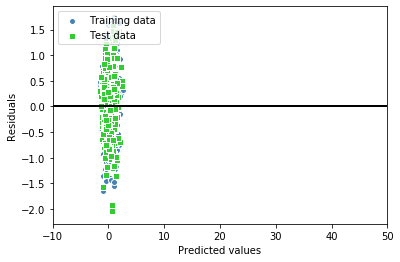

In [82]:
# Linear Regression 

res_plot = plt.scatter(y_train_pred,  y_train_pred - y_train,
                       c='steelblue', 
                       marker='o', edgecolor='white',
                       label='Training data')
res_plot = plt.scatter(y_test_pred,  y_test_pred - y_test,
                       c='limegreen', marker='s', edgecolor='white',
                       label='Test data')
res_plot = plt.xlabel('Predicted values')
res_plot = plt.ylabel('Residuals')
res_plot = plt.legend(loc='upper left')
res_plot = plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
res_plot = plt.xlim([-10, 50])

plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [86]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test, y_test_pred)

R_squared_train = r2_score(y_train, y_train_pred)
R_squared_test  = r2_score(y_test, y_test_pred) 

print("MSE_train: ", MSE_train, "\n", "MSE_test: ", MSE_test, "\n", 
      "R_squared_train: ", R_squared_train, "\n", "R_squared_test: ", R_squared_test, "\n")

MSE_train:  0.3796190487191054 
 MSE_test:  0.39729962996752777 
 R_squared_train:  0.6271470626341014 
 R_squared_test:  0.58451014087061 



In [105]:
#Ridge
from sklearn.linear_model import Ridge

MSE_train = []
MSE_test  = []
R_sq_train = []
R_sq_test  = []


for alpha in [0,0.01,0.5,1.0,1.5,2.0,3.0,4.0,5.0,8.0,10.0,15.0,100]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train,y_train)
    
    y_train_pred = ridge.predict(X_train)
    y_test_pred  = ridge.predict(X_test)
    
    MSE_train.append(mean_squared_error(y_train, y_train_pred))
    MSE_test.append(mean_squared_error(y_test, y_test_pred))
    R_sq_train.append(r2_score(y_train, y_train_pred))
    R_sq_test.append(r2_score(y_test, y_test_pred))

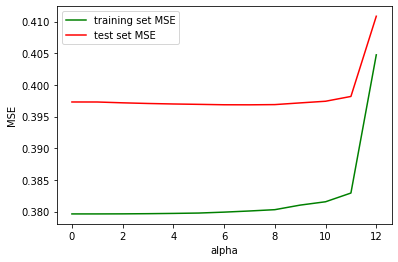

In [106]:
MSE = plt.plot(MSE_train,"g",label = "training set MSE")
MSE = plt.plot(MSE_test,"r", label = "test set MSE")
MSE = plt.legend()
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

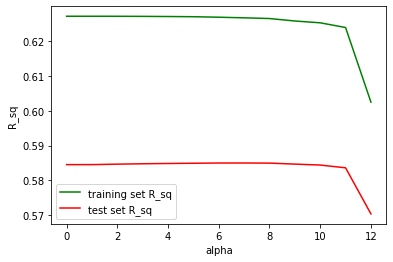

In [107]:
R_sq = plt.plot(R_sq_train,"g",label = "training set R_sq")
R_sq = plt.plot(R_sq_test,"r", label = "test set R_sq")
R_sq = plt.legend()
plt.xlabel("alpha")
plt.ylabel("R_sq")
plt.show()

In [108]:
MSE_train


[0.3796190487191054,
 0.3796190528167135,
 0.3796288215122243,
 0.3796563566561884,
 0.3796992672634333,
 0.3797555021619673,
 0.37990111776543084,
 0.38008175269174915,
 0.38028880258191117,
 0.38101069779634256,
 0.38153924413342544,
 0.38291677281260134,
 0.4047466752559282]

In [109]:
MSE_test

[0.3972996299675277,
 0.397296683643308,
 0.3971673898087519,
 0.3970631854045688,
 0.39698331746197696,
 0.3969246033372966,
 0.396860027943909,
 0.3968516395330162,
 0.39688601221029063,
 0.3971552206398954,
 0.3974153195139616,
 0.3981736950820104,
 0.4108422771071338]

In [110]:
R_sq_train


[0.6271470626341014,
 0.6271470586095267,
 0.6271374640256201,
 0.6271104196522084,
 0.6270682738589206,
 0.6270130412588399,
 0.6268700210240523,
 0.6266926056306574,
 0.6264892460785256,
 0.6257802175087548,
 0.6252610916772658,
 0.6239081152761354,
 0.6024672964450761]

In [111]:
R_sq_test


[0.5845101408706102,
 0.5845132220912875,
 0.5846484356003221,
 0.584757410967901,
 0.584840935637227,
 0.5849023379682445,
 0.5849698699241741,
 0.584978642395622,
 0.5849426959769461,
 0.584661161930458,
 0.5843891545174276,
 0.5835960569805345,
 0.5703474482128448]

In [113]:
# fitting the model with alpha as 1
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [114]:
ridge.intercept_


0.013152255894882926

In [115]:
ridge.coef_


array([ 0.7567525 ,  0.53308337,  0.33396018, -0.20208873,  0.10316436,
        0.07601218,  0.097414  ,  0.43321906])

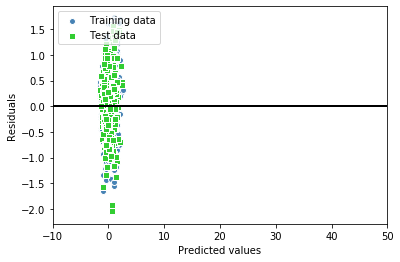

In [116]:
res_plot = plt.scatter(y_train_pred,  y_train_pred - y_train,
                       c='steelblue', 
                       marker='o', edgecolor='white',
                       label='Training data')
res_plot = plt.scatter(y_test_pred,  y_test_pred - y_test,
                       c='limegreen', marker='s', edgecolor='white',
                       label='Test data')
res_plot = plt.xlabel('Predicted values')
res_plot = plt.ylabel('Residuals')
res_plot = plt.legend(loc='upper left')
res_plot = plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
res_plot = plt.xlim([-10, 50])

plt.show()

In [117]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test, y_test_pred)

R_squared_train = r2_score(y_train, y_train_pred)
R_squared_test  = r2_score(y_test, y_test_pred) 


In [118]:
print("Ridge","\n\n","MSE_train: ", MSE_train, "\n", "MSE_test: ", MSE_test, "\n", 
      "R_squared_train: ", R_squared_train, "\n", "R_squared_test: ", R_squared_test, "\n")

Ridge 

 MSE_train:  0.3796563566561884 
 MSE_test:  0.3970631854045688 
 R_squared_train:  0.6271104196522084 
 R_squared_test:  0.584757410967901 



In [120]:
#Lasso
from sklearn.linear_model import Lasso
MSE_train = []
MSE_test  = []
R_sq_train = []
R_sq_test  = []


for alpha in [0.001,0.01,0.03,0.5,1.0,1.5,2.0]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train,y_train)
    
    y_train_pred = lasso.predict(X_train)
    y_test_pred  = lasso.predict(X_test)
    
    MSE_train.append(mean_squared_error(y_train, y_train_pred))
    MSE_test.append(mean_squared_error(y_test, y_test_pred))
    R_sq_train.append(r2_score(y_train, y_train_pred))
    R_sq_test.append(r2_score(y_test, y_test_pred))

In [121]:
MSE_train

[0.3797372262266787,
 0.3825286978217425,
 0.3927564509209498,
 1.0004313752785017,
 1.0181468634819062,
 1.0181468634819062,
 1.0181468634819062]

In [122]:
MSE_test

[0.3970160774150234,
 0.39770985096192174,
 0.40410827341167355,
 0.942887145104154,
 0.958273397949644,
 0.958273397949644,
 0.958273397949644]

In [123]:
R_sq_test

[0.5848066757808122,
 0.5840811380467549,
 0.5773897659895622,
 0.013943085911615194,
 -0.00214762131563373,
 -0.00214762131563373,
 -0.00214762131563373]

In [124]:
R_sq_train

[0.6270309914543806,
 0.6242892734417971,
 0.6142438139250531,
 0.017399737541615834,
 0.0,
 0.0,
 0.0]

In [125]:
# fitting the lasso model with alpha as 0.01
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [126]:
lasso.intercept_

0.01350054170333135

In [127]:
lasso.coef_


array([ 0.63669179,  0.41357108,  0.22401114, -0.27335117,  0.10203559,
       -0.        , -0.        ,  0.41587631])

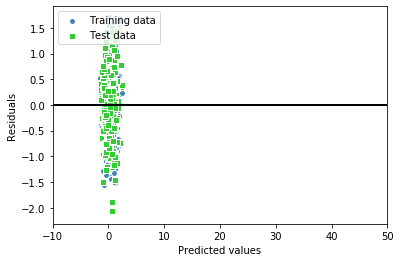

In [128]:
res_plot = plt.scatter(y_train_pred,  y_train_pred - y_train,
                       c='steelblue', 
                       marker='o', edgecolor='white',
                       label='Training data')
res_plot = plt.scatter(y_test_pred,  y_test_pred - y_test,
                       c='limegreen', marker='s', edgecolor='white',
                       label='Test data')
res_plot = plt.xlabel('Predicted values')
res_plot = plt.ylabel('Residuals')
res_plot = plt.legend(loc='upper left')
res_plot = plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
res_plot = plt.xlim([-10, 50])

plt.show()

In [129]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test, y_test_pred)

R_squared_train = r2_score(y_train, y_train_pred)
R_squared_test  = r2_score(y_test, y_test_pred) 


In [130]:
print("Lasso","\n\n","MSE_train: ", MSE_train, "\n", "MSE_test: ", MSE_test, "\n", 
      "R_squared_train: ", R_squared_train, "\n", "R_squared_test: ", R_squared_test, "\n")

Lasso 

 MSE_train:  0.3825286978217425 
 MSE_test:  0.39770985096192174 
 R_squared_train:  0.6242892734417971 
 R_squared_test:  0.5840811380467549 

